### Data Acquisition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/data.zip", 'r')
zip_ref.extractall("/content/ISL-Dataset")
zip_ref.close()

### Divide Dataset

In [ ]:

import os
import numpy as np
import shutil
import random

# Defining paths to root folders

root_dir='ISL-Dataset/Train-Test/'
src='ISL-Dataset/data/'
train_path=root_dir+'/Train/'
test_path=root_dir+'/Test/'

classes_dir=['1','2','3','4','5','6','7','8','9','A','B','C','D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

test_ratio=0.2

#Iterating through all the classes

for cls in classes_dir:

  #Creating Train and Test folders

  os.makedirs(train_path+cls)
  os.makedirs(test_path+cls)

  # Dividing images into train and test set

  all_file_names=os.listdir(src+cls)
  np.random.shuffle(all_file_names)
  train_file_names,test_file_names=np.split(np.array(all_file_names),[int(len(all_file_names)*(1-test_ratio))])

  train_file_names=[src+'/'+cls+'/'+name for name in train_file_names.tolist()]
  test_file_names=[src+'/'+cls+'/'+name for name in test_file_names.tolist()]

  print('In class ',cls )
  print('Total Images ',len(all_file_names))
  print('Training images ',len(train_file_names))
  print('Test images ',len(test_file_names))

  # copy - pasting images
  for name in train_file_names:
    shutil.copy(name, root_dir+'/Train/'+cls)
  print("Training complete!")

  for name in test_file_names:
    shutil.copy(name, root_dir+'/Test/'+cls)
  print('Testing complete!')


In class  1
Total Images  1201
Training images  960
Test images  241
Training complete!
Testing complete!
In class  2
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  3
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  4
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  5
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  6
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  7
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  8
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  9
Total Images  1200
Training images  960
Test images  240
Training complete!
Testing complete!
In class  A
Total Images  1200
Training images

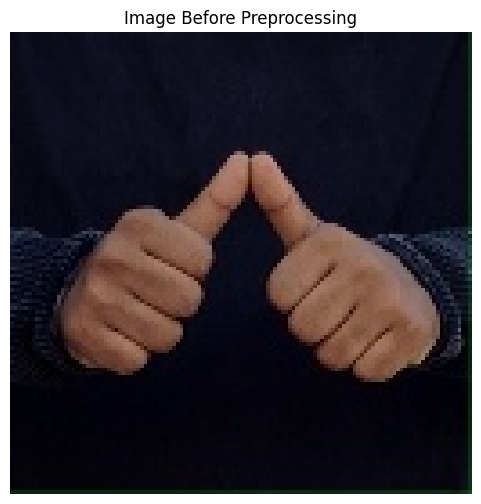

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'ISL-Dataset/Train-Test/Train/A/1008.jpg'
image = cv2.imread(image_path)

# Convert image from BGR to RGB (as OpenCV loads in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6,6))
plt.title("Image Before Preprocessing")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


### Data Preprocessing

In [ ]:
#Importing the required libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import imageio
from google.colab.patches import cv2_imshow

# Set path to dataset images

image_train_path='ISL-Dataset/Train-Test/Train'
image_test_path='ISL-Dataset/Train-Test/Test'

# Load folder into array-image_files and return the array

def loadImages(path,label):
  image_files=sorted([os.path.join(path,label,file)
   for file in os.listdir(path+str('/')+label) if file.endswith('.jpg')
  ])
  return image_files


# Function to display images

def display(img,title="Original"):
    plt.imshow(img,cmap='gray'),plt.title(title)
    plt.show()

# Preprocessing all the images to extract ROI i.e. hands

path='/content/ISL-Dataset/Train-Test/Train/'

def preprocess_images(data,label):
    for image in data:

        #reading image
        img=imageio.imread(image)

        #Converting image to grayscale
        gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

        #Converting image to HSV format
        hsv_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

        #Defining boundary level for skin color in HSV
        skin_color_lower= np.array([0,40,30],np.uint8)
        skin_color_upper= np.array([43,255,255],np.uint8)

        #Producing mask
        skin_mask=cv2.inRange(hsv_img,skin_color_lower,skin_color_upper)

        #Removing Noise from mask
        skin_mask=cv2.medianBlur(skin_mask,5)
        skin_mask=cv2.addWeighted(skin_mask,0.5,skin_mask,0.5,0.0)

        #Applying Morphological operations
        kernel=np.ones((5,5),np.uint8)
        skin_mask=cv2.morphologyEx(skin_mask,cv2.MORPH_CLOSE,kernel)

        #Extracting hand by applying mask
        hand=cv2.bitwise_and(gray_img,gray_img,mask=skin_mask)

        #Get edges by Canny edge detection
        canny=cv2.Canny(hand,60,60)

        #save preprocessed images
        fp=image
        cv2.imwrite(fp,canny)


signs=['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

for label in signs:
    images=[]
    images_train=loadImages(image_train_path,label)
    images_test=loadImages(image_test_path,label)
    preprocess_images(images_train,label)
    preprocess_images(images_test,label)


<ipython-input-4-0e63f1da2877>:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(image)


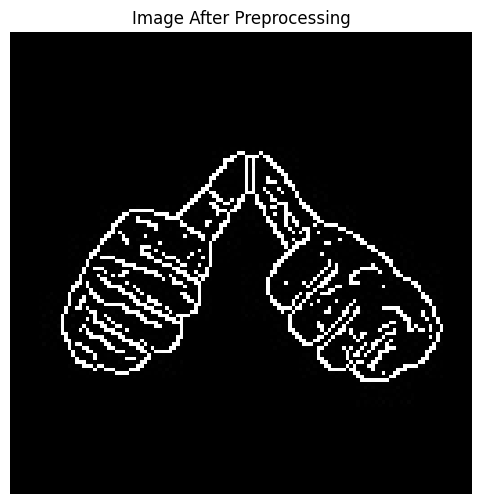

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'ISL-Dataset/Train-Test/Train/A/1008.jpg'
image = cv2.imread(image_path)

# Display the image
plt.figure(figsize=(6,6))
plt.title("Image After Preprocessing")
plt.imshow(image)
plt.axis('off')
plt.show()


### SIFT Features

In [ ]:
# Importing the required libraries

import numpy as np
import cv2
import os
import pickle
import sys
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

n_classes=35
clustering_factor=6

import tensorflow as tf

# Implementing Bag of Features Model

def sift_features(images):
  sift_descriptors_class_by_class={}
  sift_descriptors_list=[]
  sift=cv2.SIFT_create()
  for key,value in images.items():
    print(key, "Started")
    features=[]
    for img in value:
      kp,desc=sift.detectAndCompute(img,None)
      if desc is not None:
                desc = desc.astype(np.float32)
                sift_descriptors_list.extend(desc)
                features.append(desc)
    sift_descriptors_class_by_class[key]=features
    print(key," Completed!")
  return [sift_descriptors_list,sift_descriptors_class_by_class]


def minibatchkmeans(k, descriptors_list):
  kmeans=MiniBatchKMeans(n_clusters=k)
  print("MiniBatchKMeans Initialized!")
  kmeans.fit(descriptors_list)
  print("Clusters Created!")
  visual_words=kmeans.cluster_centers_
  return visual_words, kmeans

# Loading train images into dictionaries which holds all images category by category

def load_images_by_category(folder):
  images={}
  for label in os.listdir(folder):
    print(label," started")
    category=[]
    path=folder+'/'+label
    for image in os.listdir(path):
      img=cv2.imread(path+'/'+image)
      if img is not None:
        category.append(img)
    images[label]=category
    print(label, "ended")
  return images


def create_histogram(all_descs,kmeans):
  features_dict={}
  for key,value in all_descs.items():
    print(key," Started!")
    category=[]
    for desc in value:
      desc = desc.astype(float)
      raw_words=kmeans.predict(desc)
      hist = np.array(np.bincount(raw_words,minlength=n_classes*clustering_factor))
      category.append(hist)
    features_dict[key]=category
    print(key," Completed!")
  return features_dict

train_folder='ISL-Dataset/Train-Test/Train'

# Load train images
train_images=load_images_by_category(train_folder)

#Extracting sift features from each image stored in train_images list

sifts=sift_features(train_images)
all_train_descriptors=sifts[0]
train_descriptors_by_class=sifts[1]

visual_words,kmeans=minibatchkmeans(n_classes*clustering_factor,all_train_descriptors)

# Calling create_histogram and getting histogram for each image
bows_train=create_histogram(train_descriptors_by_class,kmeans)


Z  started
Z ended
9  started
9 ended
O  started
O ended
I  started
I ended
P  started
P ended
B  started
B ended
5  started
5 ended
8  started
8 ended
R  started
R ended
K  started
K ended
M  started
M ended
6  started
6 ended
J  started
J ended
T  started
T ended
4  started
4 ended
3  started
3 ended
V  started
V ended
E  started
E ended
L  started
L ended
7  started
7 ended
X  started
X ended
G  started
G ended
S  started
S ended
U  started
U ended
H  started
H ended
1  started
1 ended
N  started
N ended
Y  started
Y ended
F  started
F ended
A  started
A ended
D  started
D ended
Q  started
Q ended
2  started
2 ended
W  started
W ended
C  started
C ended
Z Started
Z  Completed!
9 Started
9  Completed!
O Started
O  Completed!
I Started
I  Completed!
P Started
P  Completed!
B Started
B  Completed!
5 Started
5  Completed!
8 Started
8  Completed!
R Started
R  Completed!
K Started
K  Completed!
M Started
M  Completed!
6 Started
6  Completed!
J Started
J  Completed!
T Started
T  Completed!

In [ ]:
# Saving .csv file
import csv
loc='/content/cnn-files/train.csv'
# os.makedirs(loc)
with open(loc,'w',newline='') as file:
  writer=csv.writer(file)
  header=[]
  for i in range (1,n_classes*clustering_factor):
    header.append(str('pixel')+str(i))
  header.append('Label')
  writer.writerow(header)
  count=0
  for label in bows_train:
     # print(len(bows_train[label]))
    for i in range(len(bows_train[label])):
      list=[]
      for j in range(150):
        list.append(bows_train[label][i][j])
      list.append(label)
      writer.writerow(list)

In [ ]:
test_folder='ISL-Dataset/Train-Test/Test'

# Loading Test images
test_images=load_images_by_category(test_folder)

#Extract sift features from the image
sift_test=sift_features(test_images)[1]

bows_test=create_histogram(sift_test,kmeans)

Z  started
Z ended
9  started
9 ended
O  started
O ended
I  started
I ended
P  started
P ended
B  started
B ended
5  started
5 ended
8  started
8 ended
R  started
R ended
K  started
K ended
M  started
M ended
6  started
6 ended
J  started
J ended
T  started
T ended
4  started
4 ended
3  started
3 ended
V  started
V ended
E  started
E ended
L  started
L ended
7  started
7 ended
X  started
X ended
G  started
G ended
S  started
S ended
U  started
U ended
H  started
H ended
1  started
1 ended
N  started
N ended
Y  started
Y ended
F  started
F ended
A  started
A ended
D  started
D ended
Q  started
Q ended
2  started
2 ended
W  started
W ended
C  started
C ended
Z Started
Z  Completed!
9 Started
9  Completed!
O Started
O  Completed!
I Started
I  Completed!
P Started
P  Completed!
B Started
B  Completed!
5 Started
5  Completed!
8 Started
8  Completed!
R Started
R  Completed!
K Started
K  Completed!
M Started
M  Completed!
6 Started
6  Completed!
J Started
J  Completed!
T Started
T  Completed!

In [ ]:
import csv
loc='/content/cnn-files/test.csv'
with open(loc,'w',newline='') as file:
  writer=csv.writer(file)
  header=[]
  for i in range (1,n_classes*clustering_factor+1):
    header.append(str('pixel')+str(i))
  header.append('Label')
  writer.writerow(header)
  count=0
  for label in bows_test:
    for i in range(len(bows_test[label])):
      list=[]
      for j in range(150):
        list.append(bows_test[label][i][j])
      list.append(label)
      writer.writerow(list)

### SVM

In [ ]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train_data_svm = pd.read_csv('/content/cnn-files/train.csv')
test_data_svm = pd.read_csv('/content/cnn-files/test.csv')

# Remove unnecessary columns
train_data_svm.drop(train_data_svm.columns[151:], axis=1, inplace=True)
train_data_svm.rename(columns={train_data_svm.columns[150]: 'Label'}, inplace=True)

test_data_svm.drop(test_data_svm.columns[151:], axis=1, inplace=True)
test_data_svm.rename(columns={test_data_svm.columns[150]: 'Label'}, inplace=True)

# Encode labels for SVM
le_svm = LabelEncoder()
train_labels_encoded_svm = le_svm.fit_transform(train_data_svm['Label'])
test_labels_encoded_svm = le_svm.transform(test_data_svm['Label'])

# Prepare data for SVM
x_train_svm = train_data_svm.iloc[:, :150]
y_train_svm = train_labels_encoded_svm
x_test_svm = test_data_svm.iloc[:, :150]
y_test_svm = test_labels_encoded_svm

# SVM classifier
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train_svm, y_train_svm)
svm_predictions = svm_classifier.predict(x_test_svm)

# Evaluate SVM model
svm_accuracy = metrics.accuracy_score(y_test_svm, svm_predictions)
svm_classification_report = classification_report(y_test_svm, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test_svm, svm_predictions)

# Print SVM results
print("SVM Test Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)


SVM Test Accuracy: 0.960361861683133
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       241
           1       0.88      0.92      0.90       240
           2       0.90      0.89      0.89       240
           3       1.00      0.98      0.99       240
           4       0.99      1.00      0.99       240
           5       0.97      0.97      0.97       240
           6       0.94      0.97      0.95       240
           7       0.99      0.98      0.98       240
           8       0.97      1.00      0.99       240
           9       1.00      0.98      0.99       240
          10       0.94      0.93      0.94       240
          11       0.96      0.95      0.96       240
          12       0.98      0.97      0.98       240
          13       0.93      0.97      0.95       240
          14       0.95      0.95      0.95       240
          15       0.93      0.93      0.93       240
          16    

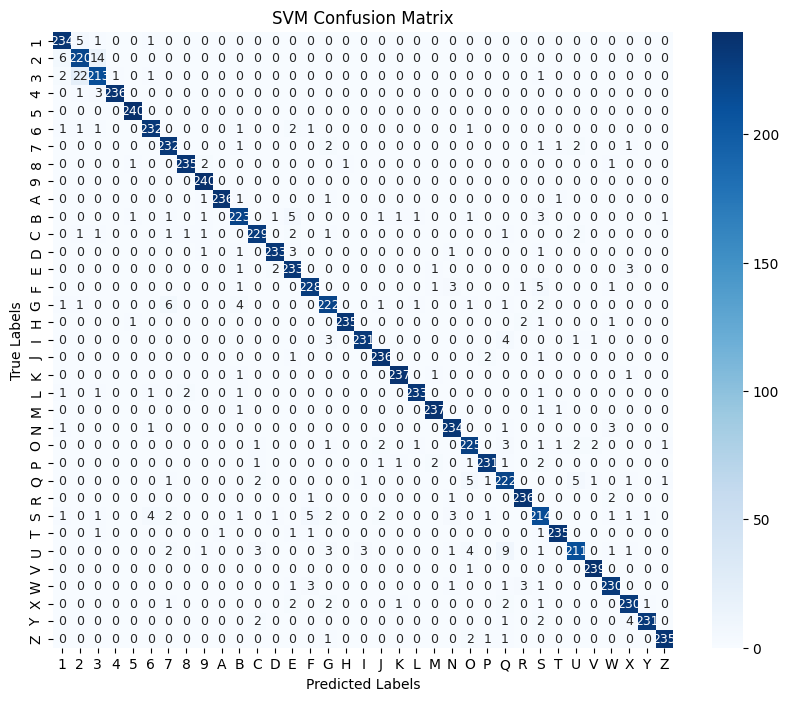

In [ ]:

# Confusion Matrix Plot
plt.figure(figsize=(10,8))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 9}, xticklabels=le_svm.classes_, yticklabels=le_svm.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Compute overall metrics
svm_accuracy = accuracy_score(y_test_svm, svm_predictions)
svm_f1_score = f1_score(y_test_svm, svm_predictions, average='weighted')
svm_precision = precision_score(y_test_svm, svm_predictions, average='weighted')
svm_recall = recall_score(y_test_svm, svm_predictions, average='weighted')

# Print final metrics
print(f"Final Accuracy: {svm_accuracy:.4f}")
print(f"Final F1 Score: {svm_f1_score:.4f}")
print(f"Final Precision: {svm_precision:.4f}")
print(f"Final Recall: {svm_recall:.4f}")


Final Accuracy: 0.9604
Final F1 Score: 0.9604
Final Precision: 0.9606
Final Recall: 0.9604


### CNN

In [ ]:
import os
import cv2
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from sklearn import svm, metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to load images for CNN
def load_images(folder):
    train_data=[]
    for label in os.listdir(folder):
        path = os.path.join(folder, label)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                new_img = cv2.resize(img, (100, 100))
                if new_img is not None:
                    train_data.append([new_img, label])
    return train_data

# Loading images for CNN
train_data = load_images('ISL-Dataset/Train-Test/Train')
test_data = load_images('ISL-Dataset/Train-Test/Test')

# Shuffling the data
random.shuffle(train_data)
random.shuffle(test_data)

# Extracting features and labels for CNN
train_images = np.array([item[0] for item in train_data]).reshape(-1, 100, 100, 1)
train_labels = np.array([item[1] for item in train_data])
test_images = np.array([item[0] for item in test_data]).reshape(-1, 100, 100, 1)
test_labels = np.array([item[1] for item in test_data])

# Normalizing images for CNN
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Encoding labels for CNN
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
test_labels_encoded = le.transform(test_labels)
train_labels_one_hot = keras.utils.to_categorical(train_labels_encoded)
test_labels_one_hot = keras.utils.to_categorical(test_labels_encoded)

# CNN model architecture
input_shape = (100, 100, 1)
n_classes = 35

# Define your CNN model with increased dropout and data augmentation
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Increased dropout rate

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Increased dropout rate

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))  # Increased dropout rate

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout before final classification layer
    model.add(Dense(n_classes, activation='softmax'))
    return model

# Create CNN model
cnn_model = create_cnn_model()

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN model with data augmentation and early stopping
epochs = 10
batch_size = 128
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_images)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = cnn_model.fit(
    datagen.flow(train_images, train_labels_one_hot, batch_size=batch_size),
    steps_per_epoch=len(train_images) // batch_size,
    epochs=epochs,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping]
)

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images, test_labels_one_hot)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")


Epoch 1/10
262/262 [==============================] - 49s 177ms/step - loss: 0.7981 - accuracy: 0.7636 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/10
262/262 [==============================] - 46s 174ms/step - loss: 0.1141 - accuracy: 0.9634 - val_loss: 6.2178e-04 - val_accuracy: 1.0000
Epoch 3/10
262/262 [==============================] - 45s 172ms/step - loss: 0.0716 - accuracy: 0.9763 - val_loss: 1.9263e-04 - val_accuracy: 1.0000
Epoch 4/10
262/262 [==============================] - 45s 170ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 3.1599e-04 - val_accuracy: 1.0000
Epoch 5/10
262/262 [==============================] - 44s 166ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 4.5921e-04 - val_accuracy: 0.9999
Epoch 6/10
262/262 [==============================] - 45s 171ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 1.8367e-05 - val_accuracy: 1.0000
Epoch 7/10
262/262 [==============================] - 45s 170ms/step - loss: 0.0312 - accuracy: 0.9901 - val_l

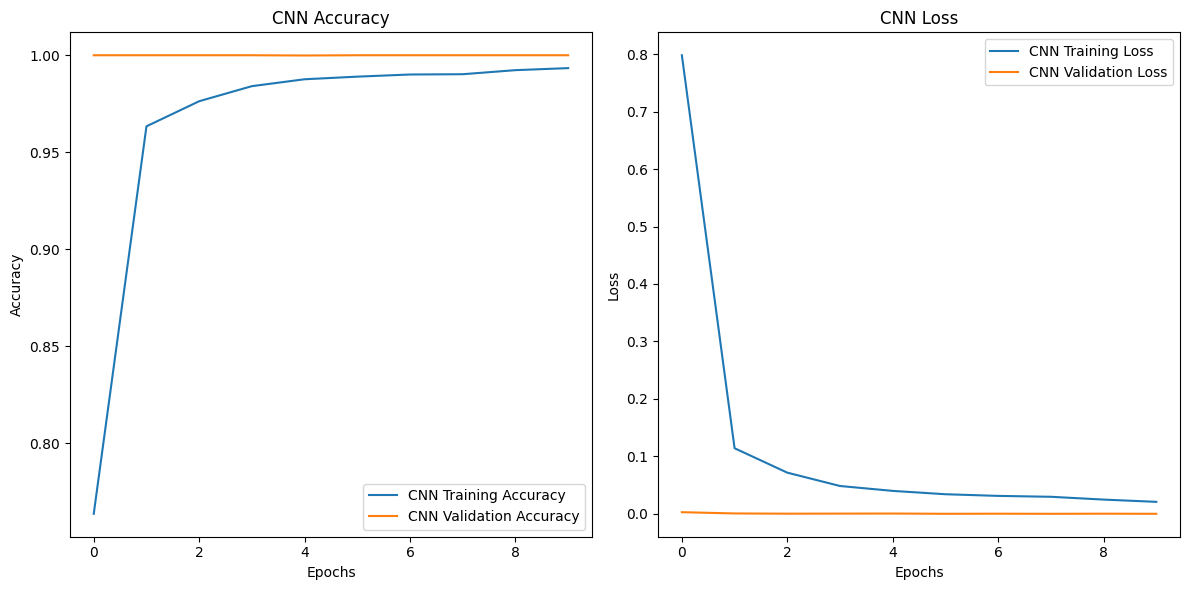

In [ ]:
# Plot CNN history (assuming `cnn_history` is available from previous code)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

file_name='/content/Saved-Files/CNN'
outfile=open(file_name,'wb')
pickle.dump(cnn_model,outfile)
outfile.close()

### Accuracies

In [ ]:
import pandas as pd

cnn_predictions = np.argmax(cnn_model.predict(test_images), axis=-1)
test_labels_encoded = np.argmax(test_labels_one_hot, axis=-1)

# Compute overall metrics for CNN
cnn_accuracy = accuracy_score(test_labels_encoded, cnn_predictions)
cnn_f1_score = f1_score(test_labels_encoded, cnn_predictions, average='weighted')
cnn_precision = precision_score(test_labels_encoded, cnn_predictions, average='weighted')
cnn_recall = recall_score(test_labels_encoded, cnn_predictions, average='weighted')

#Summary Table
summary_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'CNN': [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1_score],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1_score],
})

# Print the summary table
print(summary_table)

      Metric       CNN       SVM
0   Accuracy  0.999286  0.960362
1  Precision  0.998500  0.960602
2     Recall  0.999000  0.960362
3   F1 Score  0.998700  0.960373


## KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train_data_knn = pd.read_csv('/content/cnn-files/train.csv')
test_data_knn = pd.read_csv('/content/cnn-files/test.csv')

# Remove unnecessary columns
train_data_knn.drop(train_data_knn.columns[151:], axis=1, inplace=True)
train_data_knn.rename(columns={train_data_knn.columns[150]: 'Label'}, inplace=True)

test_data_knn.drop(test_data_knn.columns[151:], axis=1, inplace=True)
test_data_knn.rename(columns={test_data_knn.columns[150]: 'Label'}, inplace=True)

# Encode labels for KNN
le_knn = LabelEncoder()
train_labels_encoded_knn = le_knn.fit_transform(train_data_knn['Label'])
test_labels_encoded_knn = le_knn.transform(test_data_knn['Label'])

# Prepare data for KNN
x_train_knn = train_data_knn.iloc[:, :150]
y_train_knn = train_labels_encoded_knn
x_test_knn = test_data_knn.iloc[:, :150]
y_test_knn = test_labels_encoded_knn

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=15, metric='euclidean')  # You can tune n_neighbors
knn_classifier.fit(x_train_knn, y_train_knn)
knn_predictions = knn_classifier.predict(x_test_knn)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test_knn, knn_predictions)
knn_classification_report = classification_report(y_test_knn, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test_knn, knn_predictions)



In [ ]:
# Print KNN results

print("KNN Test Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", knn_classification_report)
print("KNN Confusion Matrix:\n", knn_confusion_matrix)


KNN Test Accuracy: 0.94230987651702
KNN Classification Report
             precision   recall  f1-score   support

           0   0.94      0.96      0.95       241
           1   0.87      0.90      0.88       240
           2   0.89      0.88      0.88       240
           3   0.93      0.97      0.98       240
           4   0.98      0.99      0.98       240
           5   0.96      0.96      0.96       240
           6   0.93      0.96      0.94       240
           7   0.98      0.97      0.98       240
           8   0.96      0.99      0.97       240
           9   0.92      0.97      0.98       240
          10   0.93      0.91      0.92       240
          11   0.95      0.93      0.94       240
          12   0.97      0.96      0.97       240
          13   0.92      0.96      0.94       240
          14   0.94      0.94      0.94       240
          15   0.92      0.92      0.92       240
          16   0.96      0.97      0.98       240
          17   0.97      0.95      

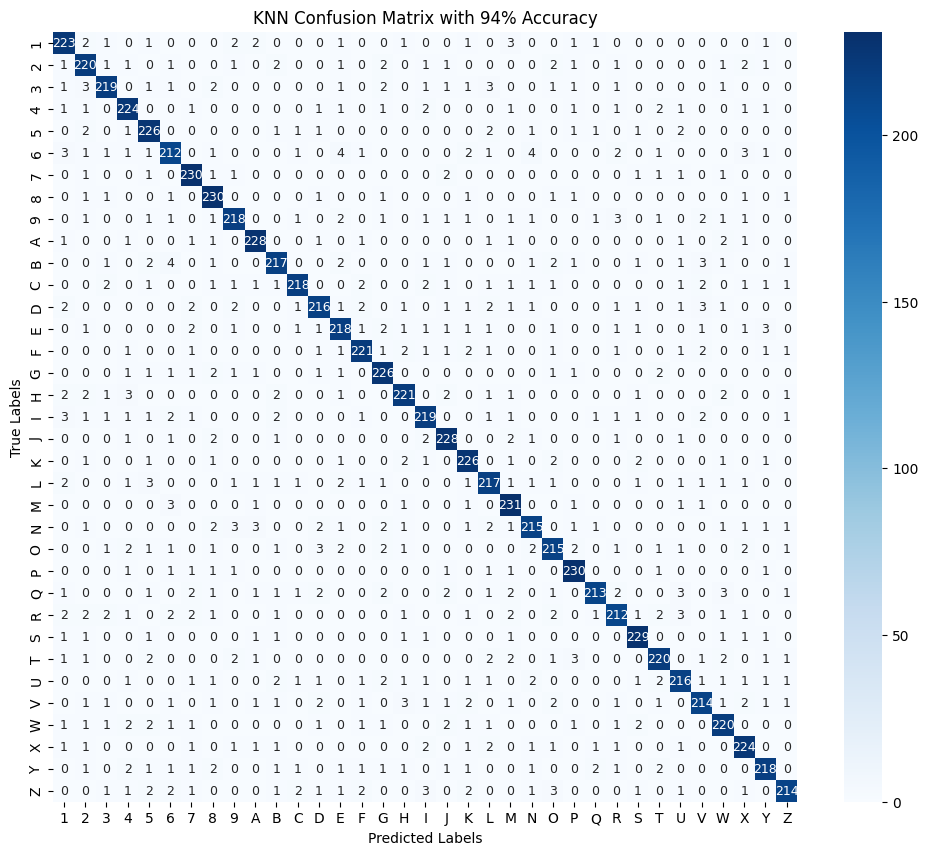

In [ ]:
# Plot Confusion Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_knn.classes_, yticklabels=le_knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()
